
---
**Box-Jenkins Method**

---
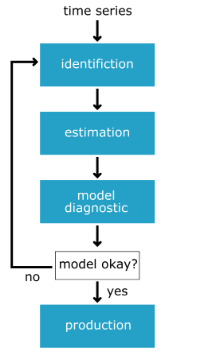

---

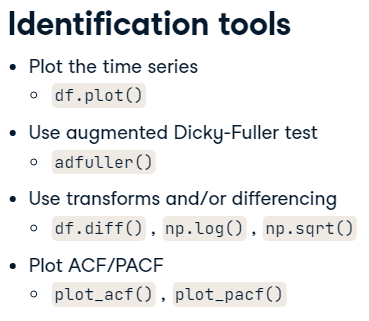


---
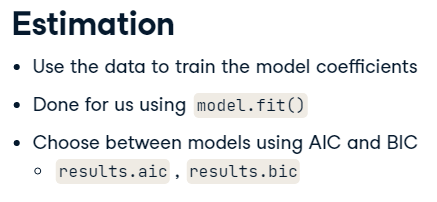

---
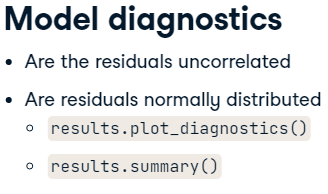

---
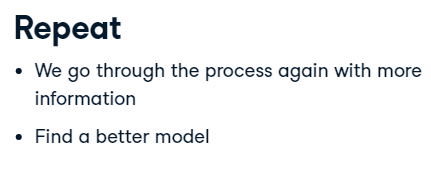

---
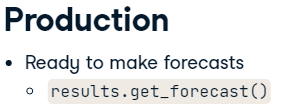






In [113]:
# import packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import seed
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [114]:
savings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/savings.txt', engine='python', sep=' ', parse_dates=['date'], index_col='date')
savings.dropna(axis=1, inplace=True)
savings.columns = ['savings']
savings.head()

,savings
date,
1955-01-01,4.9
1955-04-01,5.2
1955-07-01,5.7
1955-10-01,5.7
1956-01-01,6.2


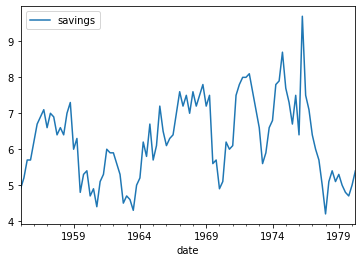

In [115]:
# Visualize data
savings.plot()
plt.show();

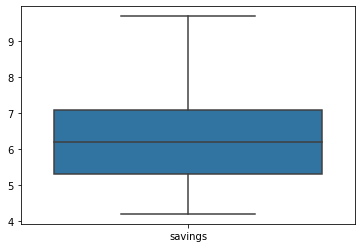

In [116]:
sns.boxplot(data=savings)
plt.show();

no outliers in data

In [117]:
# Run Dicky-Fuller test
result = adfuller(savings)

# Print test statistic
print(result[0])

# Print p-value
print(result[1])
print('Random_walk:', result[1] > 0.05)

-3.185899096242141
0.020815541644114092
Random_walk: False


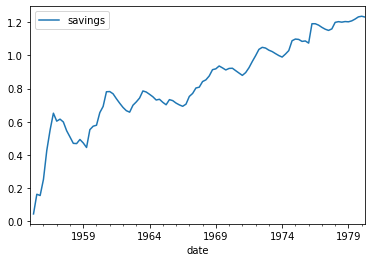

In [118]:
# plot the developing variance
savings.expanding(1).var(ddof=1).plot()
plt.show();

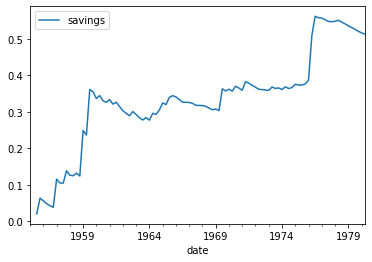

In [119]:
# plot the developing variance of the differenced savings (notice the changes in scale values)
savings.diff().expanding(1).var(ddof=1).plot()
plt.show();

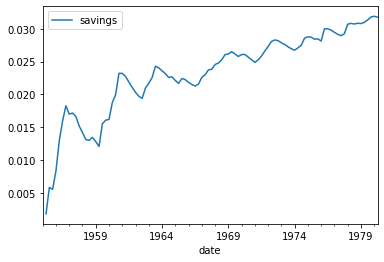

In [120]:
# plot the developing variance of the log-transform savings (notice the changes in scale values)
np.log(savings).expanding(1).var(ddof=1).plot()
plt.show();

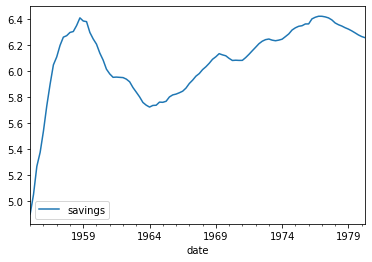

In [121]:
# plot the developing mean
savings.expanding(1).mean().plot()
plt.show();

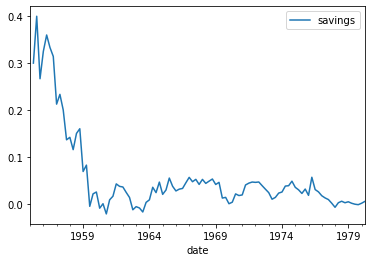

In [122]:
# plot the developing mean of the differenced savings (notice the changes in scale values)
savings.diff().expanding(1).mean().plot()
plt.show();

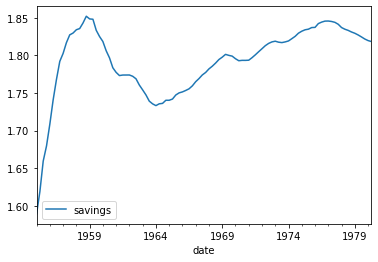

In [123]:
# plot the developing mean of the log-transform savings (notice the changes in scale values)
np.log(savings).expanding(1).mean().plot()
plt.show();



---
Although the adfuller says the time series is stationary, we may see from the foregoing plot of the developing mean and variance, a trend can be observed and therefore the adfuller test might not be correct.

---




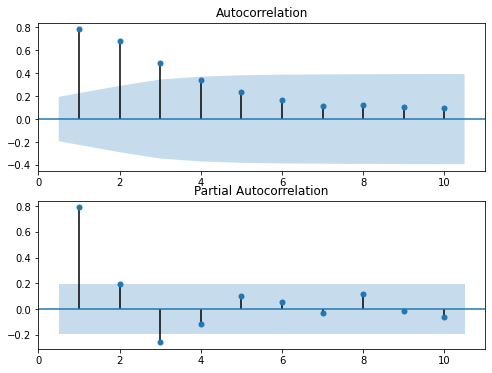

In [124]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6))
 
# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero=False, ax=ax2)

plt.show()



---
Both plots of ACF and PACF seem to tail off with significant values only up to the 3rd lags, therefore we limit our search space to 3 for both order parameters.

---






In [ ]:
order_aic_bic = []

# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = ARIMA(savings, order=(p,0,q))
        results = model.fit()
        
        # Print p, q, AIC, BIC
        order_aic_bic.append((p, q, results.aic, results.bic))
        
      except:
        order_aic_bic.append((p, q, None, None))


In [126]:
calc_order = pd.DataFrame(order_aic_bic, columns=['p','q','AIC','BIC'])
calc_order

,p,q,AIC,BIC
0,0,0,313.602866,318.852811
1,0,1,267.069710,274.944628
2,0,2,232.167827,242.667718
3,0,3,217.597205,230.722069
4,1,0,216.203480,224.078398
5,1,1,215.700389,226.200280
6,1,2,207.652984,220.777848
7,1,3,209.574983,225.324820
8,2,0,213.972322,224.472213
9,2,1,213.430359,226.555223


In [127]:
calc_order.sort_values(by=['AIC'], ascending=True).head(1)

,p,q,AIC,BIC
6,1,2,207.652984,220.777848


In [128]:
calc_order.sort_values(by=['BIC'], ascending=True).head(1)

,p,q,AIC,BIC
6,1,2,207.652984,220.777848




---

order parameters p=1, q=2, produces the least information criteria IC. Let us apply these.

---



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


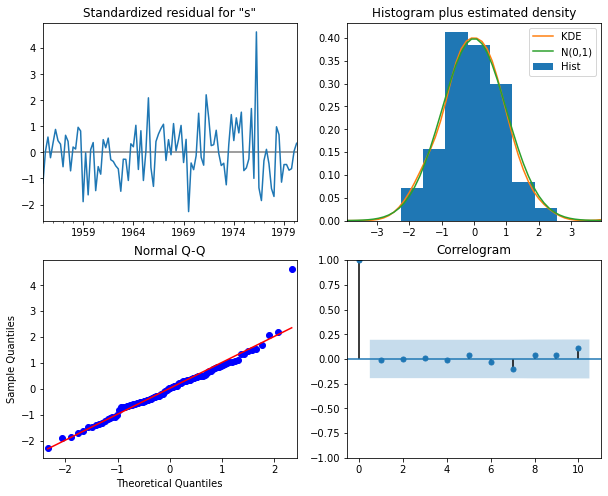

                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -98.826
Date:                Wed, 19 Oct 2022   AIC                            207.653
Time:                        14:23:51   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1949      0.323     19.169      0.000       5.561       6.828
ar.L1          0.7284      0.111      6.534      0.000       0.510       0.947
ma.L1         -0.0538      0.145     -0.370      0.7

In [129]:
# Create and fit model
model = ARIMA(savings, order=(1,0,2))
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(10,8))
plt.show()

# Print summary
print(results.summary())



---

The JB p-value is zero, which means the null hypothesis that the residuals are normally distributed should be rejected . However, the histogram and Q-Q plots show that the residuals look normal. This time the JB value was thrown off by the one outlying point in the time series. In this case, we could go back and apply some transformation to remove this outlier or probably just continue to the production stage.

---



In [130]:
# Generate one-step ahead predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower savings']
upper_limits = confidence_intervals.loc[:,'upper savings']

# Print best estimate  predictions
print(mean_forecast.head())

1973-01-01    6.862811
1973-04-01    6.386969
1973-07-01    5.707116
1973-10-01    5.680027
1974-01-01    6.511516
Freq: QS-OCT, Name: predicted_mean, dtype: float64


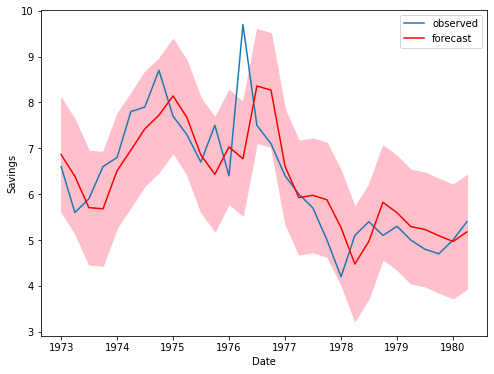

In [131]:
# plot the amazon data
plt.figure(figsize=(8, 6))

plt.plot(mean_forecast.index, savings.loc[mean_forecast.index[0]:], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Savings')
plt.legend()
plt.show()

## **Apply Differenced Values**

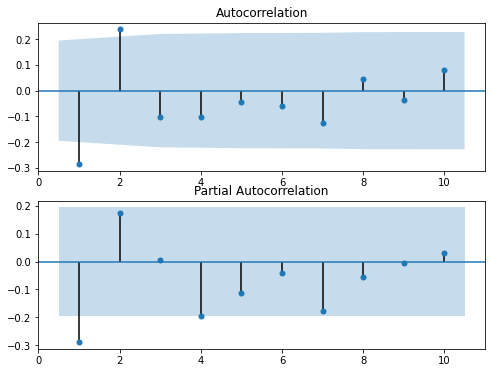

In [132]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6))
 
# Plot the ACF of savings on ax1
plot_acf(savings.diff().dropna(), lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings.diff().dropna(), lags=10, zero=False, ax=ax2)

plt.show()



---
Both plots of ACF and PACF seem to lose significant values 2 and 4 respectively, therefore we limit our search space these values.

---






In [ ]:
order_aic_bic_diff = []

# Loop over p values from 0-2
for p in range(3):
  
  # Loop over q values from 0-4
    for q in range(5):
      try:
        # Create and fit ARMA(p,q) model
        model = ARIMA(savings.diff().dropna(), order=(p,0,q))
        results = model.fit()
        
        # Print p, q, AIC, BIC
        order_aic_bic_diff.append((p, q, results.aic, results.bic))
        
      except:
        order_aic_bic_diff.append((p, q, None, None))


In [134]:
calc_order_diff = pd.DataFrame(order_aic_bic_diff, columns=['p','q','AIC','BIC'])
calc_order_diff

,p,q,AIC,BIC
0,0,0,222.298701,227.528942
1,0,1,218.063067,225.908429
2,0,2,214.691052,225.151534
3,0,3,214.113545,227.189148
4,0,4,213.880455,229.571178
5,1,0,215.729216,223.574577
6,1,1,215.850664,226.311146
7,1,2,215.525587,228.601189
8,1,3,209.854407,225.545130
9,1,4,211.739024,230.044867


In [135]:
calc_order_diff.sort_values(by=['AIC'], ascending=True).head(1)

,p,q,AIC,BIC
8,1,3,209.854407,225.54513


In [136]:
calc_order_diff.sort_values(by=['BIC'], ascending=True).head(1)

,p,q,AIC,BIC
5,1,0,215.729216,223.574577




---

order parameters p=1, q=3, should produce the least information criteria IC. Let us apply it.

---



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWar

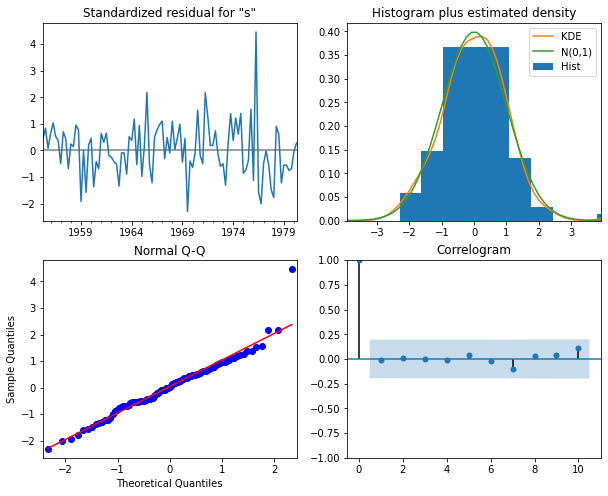

0.49238365848423715
                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  101
Model:                 ARIMA(1, 0, 3)   Log Likelihood                 -98.927
Date:                Wed, 19 Oct 2022   AIC                            209.854
Time:                        14:23:56   BIC                            225.545
Sample:                    04-01-1955   HQIC                           216.206
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.019      0.303      0.762      -0.031       0.043
ar.L1          0.7454      0.132      5.655      0.000       0.487       1.004
ma.L1         -1.0618     12.558

In [137]:
# Create and fit model
model_diff = ARIMA(savings.diff().dropna(), order=(1,0,3))
results_diff = model_diff.fit()

# Create the 4 diagostics plots
results_diff.plot_diagnostics(figsize=(10,8))
plt.show()

# Calculate mean absolute error
mae_diff = np.mean(np.abs(results_diff.resid))
print(mae_diff)

# Print summary
print(results_diff.summary())



---
No improvements are obtained by using the differenced savings as may be seen from the diagnostics plot and the p-values at the summary.

---




### **Apply the Log-Transformed Values**

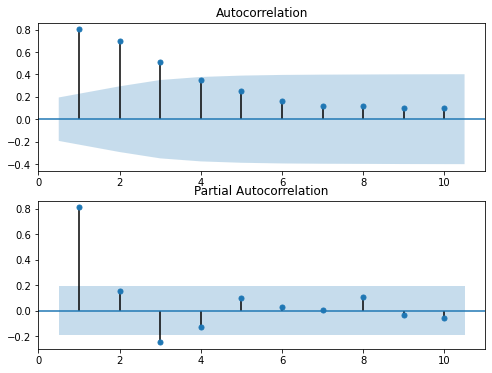

In [138]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6))
 
# Plot the ACF of savings on ax1
plot_acf(np.log(savings), lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(np.log(savings), lags=10, zero=False, ax=ax2)

plt.show()



---
Both plots of ACF and PACF seem to lose significant values at 3, therefore we limit our search space these values.

---






In [ ]:
order_aic_bic_log = []

# Loop over p values from 0-3
for p in range(4):
  
  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = ARIMA(savings.diff().dropna(), order=(p,0,q))
        results = model.fit()
        
        # Print p, q, AIC, BIC
        order_aic_bic_log.append((p, q, results.aic, results.bic))
        
      except:
        order_aic_bic_log.append((p, q, None, None))


In [140]:
calc_order_log = pd.DataFrame(order_aic_bic_log, columns=['p','q','AIC','BIC'])
calc_order_log

,p,q,AIC,BIC
0,0,0,222.298701,227.528942
1,0,1,218.063067,225.908429
2,0,2,214.691052,225.151534
3,0,3,214.113545,227.189148
4,1,0,215.729216,223.574577
5,1,1,215.850664,226.311146
6,1,2,215.525587,228.601189
7,1,3,209.854407,225.545130
8,2,0,214.830637,225.291119
9,2,1,216.829573,229.905176


In [141]:
calc_order_log.sort_values(by=['AIC'], ascending=True).head(1)

,p,q,AIC,BIC
7,1,3,209.854407,225.54513


In [142]:
calc_order_log.sort_values(by=['BIC'], ascending=True).head(1)

,p,q,AIC,BIC
4,1,0,215.729216,223.574577




---

order parameters p=1, q=3, should produce the least information criteria IC. Let us apply it.

---



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


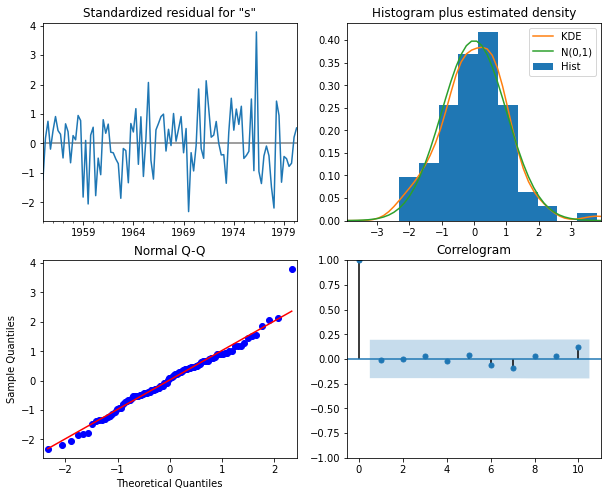

0.07813114844003398
                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:                 ARIMA(1, 0, 3)   Log Likelihood                  91.039
Date:                Wed, 19 Oct 2022   AIC                           -170.078
Time:                        14:24:02   BIC                           -154.328
Sample:                    01-01-1955   HQIC                          -163.700
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8069      0.049     36.548      0.000       1.710       1.904
ar.L1          0.7535      0.141      5.327      0.000       0.476       1.031
ma.L1         -0.0482      0.189

In [143]:
# Create and fit model
model_log = ARIMA(np.log(savings), order=(1,0,3))
results_log = model_log.fit()

# Create the 4 diagostics plots
results_log.plot_diagnostics(figsize=(10,8))
plt.show()

# Calculate mean absolute error
mae_log = np.mean(np.abs(results_log.resid))
print(mae_log)

# Print summary
print(results_log.summary())



---
No improvements are obtained by using the log_transformed savings as may be seen from the diagnostics plot and the p-values at the summary.

---


